# Naive Bayes

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/MachineLearning/Part3_Classification/Section18_Naive_Bayes/Python

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/MachineLearning/Part3_Classification/Section18_Naive_Bayes/Python


## Importing the dataset

In [4]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

len(X_train), len(X_test), len(y_train), len(y_test)

(300, 100, 300, 100)

## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
print(X_train)

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]
 [-1.20093113 -1.58254245]
 [ 2.1661655   0.93986109]
 [-0.01254409  1.22979253]
 [ 0.18552042  1.08482681]
 [ 0.38358493 -0.48080297]
 [-0.30964085 -0.30684411]
 [ 0.97777845 -0.8287207 ]
 [ 0.97777845  1.8676417 ]
 [-0.01254409  1.25878567]
 [-0.90383437  2.27354572]
 [-1.20093113 -1.58254245]
 [ 2.1661655  -0.79972756]
 [-1.39899564 -1.46656987]
 [ 0.38358493  2.30253886]
 [ 0.77971394  0.76590222]
 [-1.00286662 -0.30684411]
 [ 0.08648817  0.76590222]
 

## Training the Naive Bayes model on the Training set

In [10]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Predicting a new result

In [11]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


## Predicting the Test set results

In [12]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(-1,1), y_test.reshape(-1,1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


## Making the Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[65  3]
 [ 7 25]]


0.9

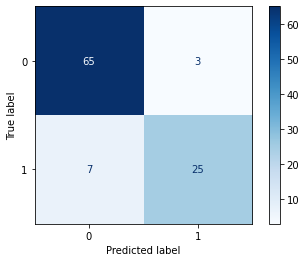

In [14]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X_test, y_test, cmap="Blues")

## Visualising the Training set results

No handles with labels found to put in legend.


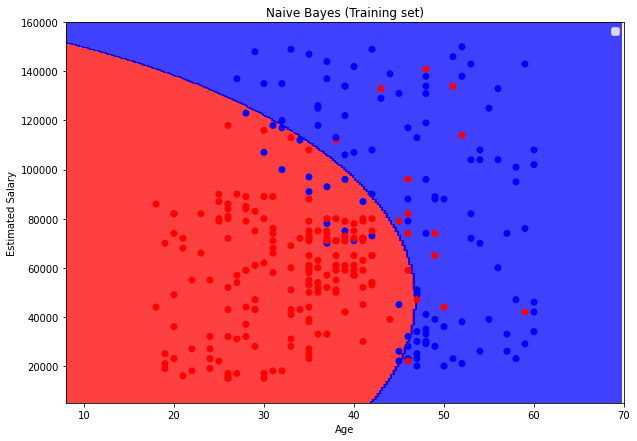

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train

X1_min, X1_max = X[:,0].min()-10, X[:,0].max()+10
X2_min, X2_max = X[:,1].min()-10000, X[:,1].max()+10000

X1, X2 = np.meshgrid(np.arange(X1_min, X1_max, step=0.25),
                     np.arange(X2_min, X2_max, step=0.25))

X_in = np.array([X1.ravel(), X2.ravel()]).T
X_in = sc.transform(X_in)
# predict 
y_pred = classifier.predict(X_in).reshape(X1.shape)
# plotting
plt.figure(figsize=(10,7))
plt.xlim(X1_min, X1_max)
plt.ylim(X2_min, X2_max)

plt.contourf(X1, X2, y_pred, alpha=0.75, cmap=ListedColormap(("red","blue")))
plt.scatter(X_set[:,0], X_set[:,1], c=y_train, cmap=ListedColormap(("red", "blue")))
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

No handles with labels found to put in legend.


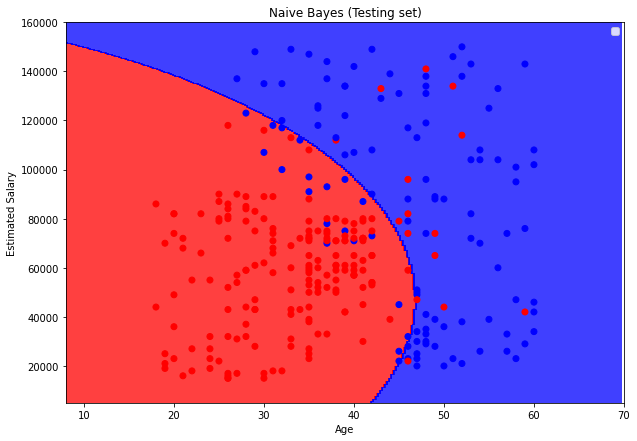

In [22]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train

X1_min, X1_max = X[:,0].min()-10, X[:,0].max()+10
X2_min, X2_max = X[:,1].min()-10000, X[:,1].max()+10000

X1, X2 = np.meshgrid(np.arange(X1_min, X1_max, step=0.25),
                     np.arange(X2_min, X2_max, step=0.25))

X_in = np.array([X1.ravel(), X2.ravel()]).T
X_in = sc.transform(X_in)
# predict 
y_pred = classifier.predict(X_in).reshape(X1.shape)
# plotting
plt.figure(figsize=(10,7))
plt.xlim(X1_min, X1_max)
plt.ylim(X2_min, X2_max)

plt.contourf(X1, X2, y_pred, alpha=0.75, cmap=ListedColormap(("red","blue")))
plt.scatter(X_set[:,0], X_set[:,1], c=y_train, cmap=ListedColormap(("red", "blue")))
plt.title('Naive Bayes (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()